## 5.2 데이터 분석 및 전처리

### 데이터 불러오기 및 분석하기
5장에서 사용할 데이터인 쿼라 데이터를 불러온 후 탐색적 데이터 분석 과정을 진행한다.  

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sjs2109","key":"965be3414759879085538610edd65541"}'}

In [0]:
!mkdir .kaggle && mv kaggle.json .kaggle && mv .kaggle ~/

In [5]:
!mkdir data_in && mkdir data_out

mkdir: cannot create directory ‘data_in’: File exists


In [10]:
!kaggle competitions download -c quora-insincere-questions-classification -p=./data_in

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
embeddings.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
import zipfile

In [0]:
DATA_IN_PATH = './data_in/'

In [0]:
file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [14]:
!ls ./data_in

embeddings.zip	       sample_submission.csv.zip  test.csv.zip	train.csv.zip
sample_submission.csv  test.csv			  train.csv


In [0]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [17]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
train.csv                     124.21MB
test.csv                      35.01MB
sample_submission.csv         8.64MB


In [18]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 1306122


In [19]:
train_set = pd.Series(train_data['question_text'].tolist() )
train_set.head()

0    How did Quebec nationalists see their province...
1    Do you have an adopted dog, how would you enco...
2    Why does velocity affect time? Does velocity a...
3    How did Otto von Guericke used the Magdeburg h...
4    Can I convert montra helicon D to a mountain b...
dtype: object

In [20]:
print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

교육 데이터의 총 질문 수: 1306122
반복해서 나타나는 질문의 수: 0


Text(0, 0.5, 'Number of questions')

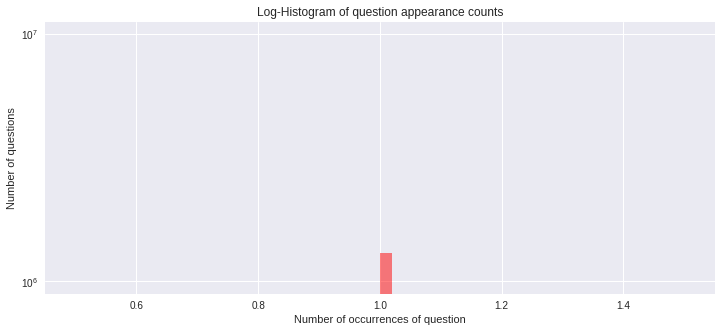

In [21]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

In [22]:
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

중복 최대 개수: 1
중복 최소 개수: 1
중복 평균 개수: 1.00
중복 표준편차: 0.00
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f92148a6320>],
 'caps': [<matplotlib.lines.Line2D at 0x7f92148a6ba8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f921489c9b0>],
 'means': [<matplotlib.lines.Line2D at 0x7f921489c668>],
 'medians': [<matplotlib.lines.Line2D at 0x7f921489c2e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f92148a64a8>,
  <matplotlib.lines.Line2D at 0x7f92148a6828>]}

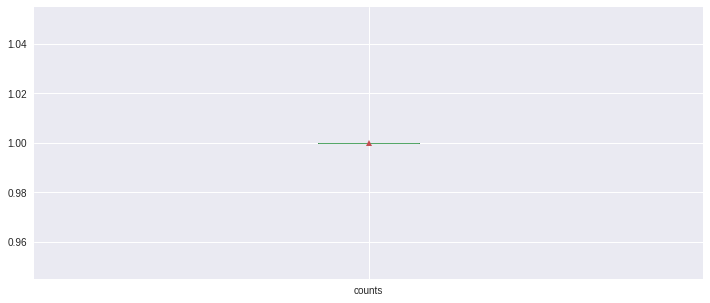

In [23]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

In [0]:
train_length = train_set.apply(len)

In [25]:
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

질문 길이 최대 값: 1017
질문 길이 평균 값: 70.68
질문 길이 표준편차: 38.78
질문 길이 중간 값: 60.0
질문 길이 제 1 사분위: 45.0
질문 길이 제 3 사분위: 85.0


In [0]:
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Prabability')

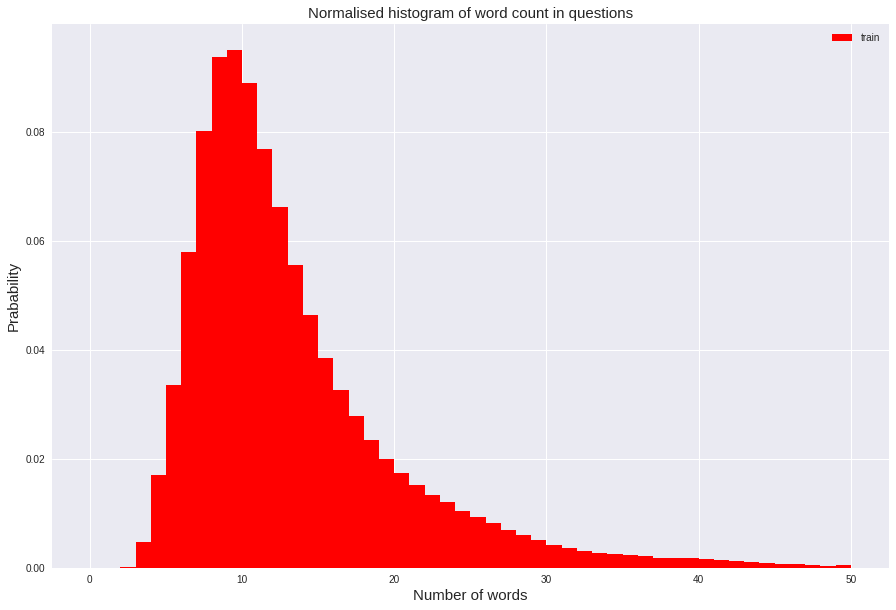

In [27]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

In [28]:
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

질문 단어 개수 최대 값: 122
질문 단어 개수 평균 값: 12.80
질문 단어 개수 표준편차: 7.05
질문 단어 개수 중간 값: 11.0
질문 단어 개수 제 1 사분위: 8.0
질문 단어 개수 제 3 사분위: 15.0
질문 단어 개수 99 퍼센트: 39.0


{'boxes': [<matplotlib.lines.Line2D at 0x7f9214695588>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9214695e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f921469dc18>],
 'means': [<matplotlib.lines.Line2D at 0x7f921469d8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f921469d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9214695710>,
  <matplotlib.lines.Line2D at 0x7f9214695a90>]}

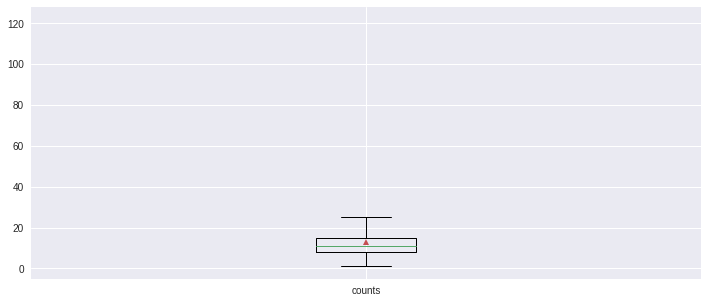

In [29]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_word_counts,
             labels=['counts'],
             showmeans=True)

In [30]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 99.98%
수학 태그가있는 질문: 0.06%
질문이 가득 찼을 때: 7.46%
첫 글자가 대문자 인 질문: 99.85%
대문자가있는 질문: 99.97%
숫자가있는 질문: 11.26%


### 데이터 전처리

In [0]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [0]:
DATA_IN_PATH = './data_in/'
FILTERS = "([~.,!?\"':;)(])"
MAX_SEQUENCE_LENGTH = 31

In [0]:
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

In [34]:
train_data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [0]:
change_filter = re.compile(FILTERS)

questions = [str(s) for s in train_data['question_text']]


filtered_questions = list()


for q in questions:
     filtered_questions.append(re.sub(change_filter, "", q).lower())
        


In [0]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions)

In [37]:
tokenizer

In [0]:
questions_sequence = tokenizer.texts_to_sequences(filtered_questions)

In [0]:
q_data = pad_sequences(questions_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [40]:
word_vocab = {}
word_vocab = tokenizer.word_index 

labels = np.array(train_data['target'], dtype=int)

print('Shape of question1 data: {}'.format(q_data.shape))
print('Shape of label: {}'.format(labels.shape))
print("Words in index: {}".format(len(word_vocab)))

Shape of question1 data: (1306122, 31)
Shape of label: (1306122,)
Words in index: 217462


In [0]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [0]:
TRAIN_Q_DATA = 'train_q.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q_DATA, 'wb'), q_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [0]:
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
# test_data = test_data.drop(test_data.tail(1217679).index,inplace=True) # drop last n rows
valid_ids = [type(x) ==int for x in test_data.qid] 
test_data = test_data[valid_ids].drop_duplicates()

In [0]:
test_questions = [str(s) for s in test_data['question_text']]

filtered_test_questions = list()

for q in test_questions:
     filtered_test_questions.append(re.sub(change_filter, "", q).lower())
        


In [0]:
test_questions_sequence = tokenizer.texts_to_sequences(filtered_test_questions)


test_q_data = pad_sequences(test_questions_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')


In [46]:
test_id = np.array(test_data['qid'])

print('Shape of question1 data: {}'.format(test_q_data.shape))
print('Shape of question2 data:{}'.format(test_q_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (0, 31)
Shape of question2 data:(0, 31)
Shape of ids: (0,)


In [0]:
TEST_Q_DATA = 'test_q.npy'

TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q_DATA, 'wb'), test_q_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)